In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
def model(x, t):
    k = np.array([[0, 1],[-4, -3]])
    return k.dot(x)

x0 = np.array([-1, -0.5])

start = 0
stop = 10
num = 100001
h = (stop - start) / num
t = np.linspace(start, stop, num)

def midrectg(x):
    return np.sum((x[1:] + x[:-1]) / 2) * h

In [3]:
x = odeint(model, x0, t)
x1 = x[:,0]
x2 = x[:,1]

In [4]:
I = 24*x1**2 + 12*x1*x2 + 6*x2**2

In [5]:
sumI = midrectg(I)
print('Cost functional value is ', sumI)

Cost functional value is  14.499855024852188


In [6]:
Ival = np.zeros(num)
for i in range(num-1):    
    Ival[i+1] = midrectg(I[:i+2])

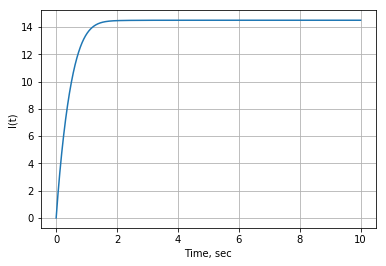

In [7]:
plt.plot(t, Ival)
plt.xlabel('Time, sec')
plt.ylabel('I(t)')
plt.grid(True)

In [8]:
err = 1e-4
b = abs(Ival[1:] - Ival[:-1]) < err
fixt = h * (np.argmax(b == True) + 1) 
print('Fixation time with error of', err, 'is', fixt, 'seconds.')

Fixation time with error of 0.0001 is 1.3706862931370687 seconds.


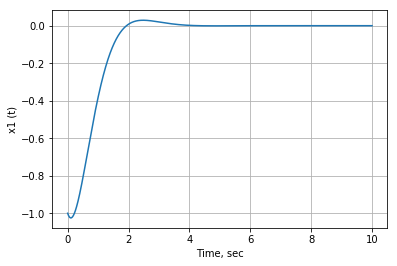

In [9]:
plt.plot(t, x1)
plt.xlabel('Time, sec')
plt.ylabel('x1 (t)')
plt.grid(True)

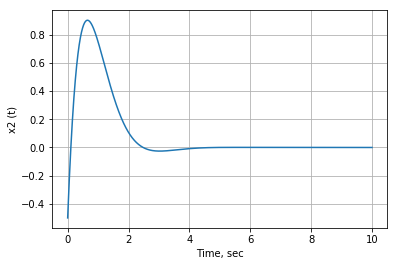

In [10]:
plt.plot(t, x2)
plt.xlabel('Time, sec')
plt.ylabel('x2 (t)')
plt.grid(True)